# Lesson 1: The Python language

<br><br>

## Before we begin: navigation in Jupyter

<br>

In each lesson directory, open the "lecture-workbook.ipynb" instead of these slides.

<br>

When you see the notebook,

 1. Click on a code cell to edit it.
 2. Control-enter to run it.
 3. Shift-enter to run it and move on to the next cell.

But be sure to evaluate all code cells so that you're not missing any data.

<br>

If you need to refresh your notebook's state, use the **Kernel → Restart Kernel and Run up to Selected Cell** menu item.

## Why Python?

In many ways of measuring it, Python is now the most popular programming language.

<br>

<table width="85%">
    <tr style="background: white;">
        <td width="100%"><img src="../img/python-rankings-tiobe-2022.png" width="100%"></td>
        <td width="100%"><img src="../img/python-rankings-pypl-2022.png" width="100%"></td>
    </tr>
    <tr style="background: white;">
        <td width="100%"><img src="../img/python-rankings-stackoverflow-2022.png" width="100%"></td>
        <td width="100%"><img src="../img/python-rankings-githut-2022.png" width="100%"></td>
    </tr>
</table>

More importantly, it is the most widely used language for data analysis and machine learning.

<br>

<center>
<img src="../img/analytics-by-language.svg" width="65%">
</center>

"Popularity" means more tools are available, more attention has been drawn to their shortcomings, and you can find more information about how to use them online.

<br><br><br>

It also means that Python skills are transferable skills.

<br><br><br>

This first lesson is a tour (possibly review) of Python syntax, using physics data analysis as examples.

## Tour of Python syntax

### Using Python as a desk calculator

<br>

In [ ]:
2 + 2

<br><br>

Defining variables

In [ ]:
E = 68.1289790
px = -17.945541
py = 13.1652603
pz = 64.3908386

<br><br>

Now we can use `E`, `px`, `py`, `pz`:

In [ ]:
px

Calculate ${p_x}^2 + {p_y}^2$:

In [ ]:
px**2 + py**2

<br><br><br>

Now $\displaystyle \sqrt{{p_x}^2 + {p_y}^2 + {p_z}^2}$:

In [ ]:
(px**2 + py**2 + pz**2)**(1/2)

We'll be using these equations a lot:

<br><br>

$$p = \sqrt{{p_x}^2 + {p_y}^2 + {p_z}^2}$$

<br>

$$m = \sqrt{E^2 - p^2}$$

<br><br>

**Quizlet:** Fix the mistake!

In [ ]:
m = (E**2 - px**2 + py**2 + pz**2)**(1/2)
m

### Functions

<br>

The syntax for defining a function is:

In [ ]:
def euclidean(x, y, z):
    return (x**2 + y**2 + z**2)**(1/2)

def minkowski(time, space):
    return (time**2 - space**2)**(1/2)

<br>

We can call them with arguments identified by position or by name.

In [ ]:
euclidean(px, py, pz)

<br>

In [ ]:
euclidean(z=pz, y=py, x=px)

<br>

Function calls can be arguments to function calls.

In [ ]:
minkowski(E, euclidean(px, py, pz))

Nested indenting only needs to be deeper and pop back to the previous level, but a standard of 2 or 4 spaces are often used.

<br>

Beware: **tab** is not **space**! (Though both are invisible.)

In [ ]:
def mass(E, px, py, pz):
    def euclidean(x, y, z):
        return (x**2 + y**2 + z**2) ** (1 / 2)

    def minkowski(time, space):
        return (time**2 - space**2) ** (1 / 2)

    return minkowski(E, euclidean(px, py, pz))


mass(E, px, py, pz)

Note: functions can be assigned as variables, too. In Python, everything is an object.

<br>

In [ ]:
mag3d = euclidean

<br>

In [ ]:
mag3d(px, py, pz)

### Importing functionality into Python

<br>

The `import` statement loads libraries, which may be from Python's standard library or something installed with `pip` or `conda`.

<br>

In [ ]:
import math

<br>

This introduced a new variable into the environment.

In [ ]:
math

<br>

Objects inside the module can be accessed with a dot (`.`).

In [ ]:
math.sqrt(E**2 - px**2 - py**2 - pz**2)

The dot-syntax prevents functions with the same names in different libraries from conflicting.

<br>

In [ ]:
import numpy

<br>

In [ ]:
numpy.sqrt

<br>

In [ ]:
math.sqrt

<br>

In [ ]:
numpy.sqrt is math.sqrt

Some libraries have conventional "short names."

In [ ]:
import numpy as np

<br>

In [ ]:
np.sqrt(E**2 - px**2 - py**2 - pz**2)

Sometimes, you might prefer to extract only one object from a library.

<br>

In [ ]:
from hepunits import GeV
from particle import Particle

<br>

In [ ]:
muon = Particle.from_name("mu+")
muon

<br>

In [ ]:
muon.mass / GeV

### Data types

<br>

Python has data types, but unlike C++, type correctness is checked just before computation, not in a separate compilation phase.

<br>

In [ ]:
1 + "2"

<br>

Check their types:

In [ ]:
type(1)

<br>

In [ ]:
type("2")

_Therefore_, types are also objects that you can assign to variables and inspect at runtime, unlike C++.

<br>

In [ ]:
t1 = type(1)
t1

<br>

In [ ]:
t2 = type("2")
t2

<br>

Most type objects are also functions that create or convert data to that type.

<br>

In [ ]:
int("2")

<br>

In [ ]:
t1("2")

**Quizlet:** before you run the following, what will it do?

<br>

In [ ]:
type(type(1)("2"))

In [ ]:
type(int)

NumPy (`import numpy as np`) has some types that look like standard Python types, but they're not.

<br>

In [ ]:
np_one = np.int32(1)
np_one

<br>

In [ ]:
type(np_one)

<br>

`np.int32` is not `int`.

<br>

In [ ]:
np.int32 == int

<br>

In [ ]:
isinstance(np_one, int)

<center>
<img src="../img/dtype-hierarchy.png" width="40%">
</center>

<br>

In [ ]:
isinstance(np.int32(1), np.int32)

### Collection types

<br>

The two most basic collection types in Python are `list` and `dict`.

<br>

In [ ]:
some_list = [0.0, 1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9]
some_list

<br>

In [ ]:
type(some_list)

In [ ]:
len(some_list)

<br>

In [ ]:
some_dict = {"one": 1.1, "two": 2.2, "three": 3.3}
some_dict

<br>

In [ ]:
type(some_dict)

In [ ]:
len(some_dict)

You can pull data out of a collection with square brackets: `[` `]`.

<br>

In [ ]:
some_list

<br>

In [ ]:
some_list[3]

<br>

In [ ]:
some_dict

<br>

In [ ]:
some_dict["two"]

You can also change the data in a collection if the square brackets are on the left of an assignment (`=`).

<br>

In [ ]:
some_list[3] = 33333

<br>

In [ ]:
some_list

<br>

In [ ]:
some_dict["two"] = 22222

<br>

In [ ]:
some_dict

And you can extend them beyond their original length, as well as mix different data types in the same collection.

<br>

In [ ]:
some_list.append("mixed types")

<br>

In [ ]:
some_list

<br>

In [ ]:
some_dict[123] = "mixed types"

<br>

In [ ]:
some_dict

Ranges within a list can be "sliced" with a colon (`:`).

<br>

In [ ]:
some_list

<br>

In [ ]:
some_list[2:8]

<br>

**Quizlet:** Before you run it, what will this do?

In [ ]:
some_list[2:8][3]

<br>

(We'll see a lot more about slices in the next lesson.)

### Note: object references and mutability

When we assign a variable in Python, we're actually creating a reference to an object in memory — not copying the object itself.
This concept becomes especially important when working with mutable (like collections) vs immutable (integers, strings) types.

In [ ]:
a = [1, 2, 3]
b = a

In [ ]:
a

In [ ]:
b

`a` and `b` point to the same list in memory
```
        +------------+
aa ---> | [1, 2, 3]  |
        +------------+
bb -----^
```

If we change the list through `b`, `a` will reflect that change too

In [ ]:
b[0] = 4

In [ ]:
b

In [ ]:
a

This happens because lists are mutable, i.e. we can change their contents in-place.

If we want to create a separate list, such that changes to one don't affect the other, we can use copy or slicing:

In [ ]:
a = [1, 2, 3]
b = a.copy()
c = a[:]
b[0] = 4
c[0] = 5

In [ ]:
a

In [ ]:
b

In [ ]:
c

In the case of integers

In [ ]:
a = 5
b = a
b = 6

when writing `b = 6` we are reassigning `b` to a new integer object, with `a` being unaffected.

### A little data analysis

<br>

In [ ]:
particles = [
    {"type": "electron", "E": 171.848714, "px": 38.4242935, "py": -28.779644, "pz": 165.006927, "charge": 1,},
    {"type": "electron", "E": 138.501266, "px": -34.431419, "py": 24.6730384, "pz": 131.864776, "charge": -1,},
    {"type": "muon", "E": 68.1289790, "px": -17.945541, "py": 13.1652603, "pz": 64.3908386, "charge": 1,},
    {"type": "muon", "E": 18.8320473, "px": -8.1843795, "py": -7.6400470, "pz": 15.1420097, "charge": -1,},
]

<br>

In [ ]:
def particle_decay(name, particle1, particle2):
    return {
        "type": name,
        "E": particle1["E"] + particle2["E"],
        "px": particle1["px"] + particle2["px"],
        "py": particle1["py"] + particle2["py"],
        "pz": particle1["pz"] + particle2["pz"],
        "charge": particle1["charge"] + particle2["charge"],
    }

Starting from the observed electrons and muons, we reconstruct unobserved particles by adding energy and momentum.

<br>

<center>
<img src="../img/higgs-to-four-leptons-diagram.png" width="50%">
</center>

In [ ]:
z1 = particle_decay("Z boson", particles[0], particles[1])
z1

<br>

In [ ]:
z2 = particle_decay("Z boson", particles[2], particles[3])
z2

<br>

In [ ]:
higgs = particle_decay("Higgs boson", z1, z2)
higgs

**Quizlet:** Define the `particle_mass` function and compute the mass of `z1`, `z2`, and `higgs`.

<br>

In [ ]:
def particle_mass(particle):
    ...

### `for` loops and `if` branches

<br><br><br>

Can you believe we got this far without `for` and `if`?

<br><br>

These are the fundamental building blocks of _imperative_ programming.

Python runs a program, one statement at a time, and `for` tells it to repeat an indented block for each value of a collection.

<br>

In [ ]:
for particle in particles:
    print(particle["type"], particle["charge"])

<br>

It doesn't even look ahead to see if there's trouble coming on the next line.

<br>

In [ ]:
for particle in particles:
    print(particle["type"])
    print(particle["charge"])
    print(particle["something it does not have"])

`if` tells it whether it should enter an indented block or not, depending on whether an expression is `True` or `False`.

<br>

In [ ]:
for particle in particles:
    if particle["type"] == "electron":
        print(particle)

<br>

It can switch between two indented blocks if an `else` clause is given.

<br>

In [ ]:
for particle in particles:
    if particle["type"] == "electron":
        print(particle)
    else:
        print("not an electron")

`if` statements can be nested.

<br>

In [ ]:
for particle in particles:
    if particle["type"] == "electron":
        if particle["charge"] > 0:
            print("e+")
        else:
            print("e-")
    else:
        if particle["charge"] > 0:
            print("mu+")
        else:
            print("mu-")

And `elif` works as a contraction of `else if` with less indenting.

<br>

In [ ]:
for particle in particles:
    if particle["type"] == "electron" and particle["charge"] > 0:
        print("e+")
    elif particle["type"] == "electron" and particle["charge"] < 0:
        print("e-")
    elif particle["type"] == "muon" and particle["charge"] > 0:
        print("mu+")
    elif particle["type"] == "muon" and particle["charge"] < 0:
        print("mu-")

### From datum (singular) to data (plural)

<br><br><br><br><br>

_(Switch out of presentation view now.)_

<br><br><br><br><br>

In [1]:
import json

In [2]:
dataset = json.load(open("../data/SMHiggsToZZTo4L.json"))

In [3]:
type(dataset)

list

In [4]:
len(dataset)

10000

Show just the first 3 collision events using a slice, `0:3`.

In [5]:
dataset[0:3]

[{'run': 1,
  'luminosityBlock': 156,
  'event': 46501,
  'PV': {'x': 0.24369880557060242,
   'y': 0.3936990201473236,
   'z': 1.451307773590088},
  'electron': [],
  'muon': [{'pt': 63.04386901855469,
    'eta': -0.7186822295188904,
    'phi': 2.968005895614624,
    'mass': 0.10565836727619171,
    'charge': 1,
    'pfRelIso03_all': 0.0,
    'pfRelIso04_all': 0.0,
    'dxy': -0.004785160068422556,
    'dxyErr': 0.0060764215886592865,
    'dz': 0.09005985409021378,
    'dzErr': 0.044572051614522934},
   {'pt': 38.12034606933594,
    'eta': -0.8794569969177246,
    'phi': -1.0324749946594238,
    'mass': 0.10565836727619171,
    'charge': -1,
    'pfRelIso03_all': 0.0,
    'pfRelIso04_all': 0.0,
    'dxy': 0.0005746808601543307,
    'dxyErr': 0.0013040687190368772,
    'dz': -0.0032290113158524036,
    'dzErr': 0.003023269586265087},
   {'pt': 4.04868745803833,
    'eta': -0.320764422416687,
    'phi': 1.0385035276412964,
    'mass': 0.10565836727619171,
    'charge': 1,
    'pfRelIso03

<br>

**Meaning of each field.** (We will only use a few of these.)

 * **run** (int): unique identifier for a data-taking period of the LHC. This is simulated data, so the run number is 1.
 * **luminosityBlock** (int): unique identifier for a period of relatively stable conditions within a run.
 * **event** (int): unique identifier for one crossing of LHC bunches.
 * **PV** (dict): primary vertex of the collision.
   - **x** (float): $x$-position in cm.
   - **y** (float): $y$-position in cm.
   - **z** (float): $z$-position (along the beamline) in cm.
 * **electron** (list of dict): list of electrons (may be empty).
   - **pt** (float): $p_T$ component of momentum transverse to the beamline in GeV/$c$.
   - **eta** (float): $\eta$ pseudorapidity (roughly, polar angle with respect to the beamline), unitless.
   - **phi** (float): $\phi$ azimuthal angle (in the plane that is perpendicular to the beamline), unitless.
   - **mass** (float): measured mass of the particle in GeV/$c^2$.
   - **charge** (int): either `+1` or `-1`, unitless.
   - **pfRelIso03_all** (float): quantity that specifies how isolated this electron is from the rest of the particles in the event, unitless.
   - **dxy** (float): distance of closest approach to the primary vertex in the plane that is perpendicular to the beamline, in cm.
   - **dxyErr** (float): uncertainty in the **dxy** measurement.
   - **dz** (float): distance of closest approach to the primary vertex in $z$, along the beamline, in cm.
   - **dzErr** (float): uncertainty in the **dz** measurement.
 * **muon** (list of dict): list of muons (may be empty) with the same dict fields as **electron**.
 * **MET** (dict): missing transverse energy (in the plane perpendicular to the beamline).
   - **pt** (float): $p_T$ magnitude, in GeV/$c$.
   - **phi** (float): $\phi$ aximuthal angle, unitless.

<br>

<br>

**Coordinate transformations:**

- $p_x = p_T \cos\phi \cosh\eta$
- $p_y = p_T \sin\phi \cosh\eta$
- $p_z = p_T \sinh\eta$
- $\displaystyle E = \sqrt{{p_x}^2 + {p_y}^2 + {p_z}^2 + m^2}$

<br>

But there's a library for that.

In [6]:
import vector

In [7]:
def to_vector(particle):
    return vector.obj(
        pt=particle["pt"],
        eta=particle["eta"],
        phi=particle["phi"],
        mass=particle["mass"],
    )

In [9]:
len(dataset[0]["muon"])

3

In [8]:
for particle in dataset[0]["muon"]:
    v = to_vector(particle)
    print(v.E, v.px, v.py, v.pz)

80.03810173614954 -62.09642131826239 10.888704252275756 -49.310821783934706
53.837451985499946 19.5441283607252 -32.729005959017954 -38.01709205284513
4.260074277908423 2.05475040026448 3.4885342087314886 -1.3210598131215057


### Mini-project: let's make an event display

There are lots, and lots, and lots of libraries for visualizing data in Python.

Matplotlib is the oldest and most popular.

In [10]:
import matplotlib.pyplot as plt  # conventional short name for Matplotlib
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# might need to run
#!pip install ipympl

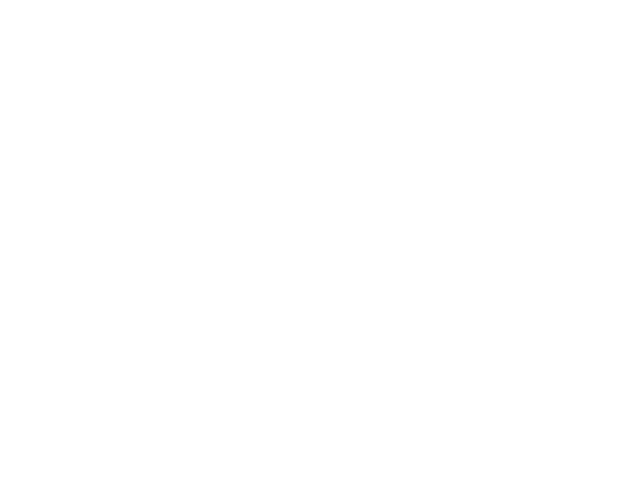

In [22]:
%matplotlib widget

fig = plt.figure()

In [23]:
import numpy as np
fig.clf()  # clear figure
ax = fig.add_subplot(111, projection="3d")

# 25 Gaussian-distributed (x, y, z) triplets
for x, y, z in np.random.normal(0, 1, (25, 3)):
    # make a black line from (0, 0, 0) to (x, y, z)
    ax.plot([0, x], [0, y], [0, z], c="black")

In [24]:
def draw_particle(ax, particle, color):
    v = to_vector(particle)
    ax.plot([0, v.px], [0, v.py], [0, v.pz], c=color)

In [25]:
def draw_event(ax, event):
    for particle in event["electron"]:
        draw_particle(ax, particle, "blue")
    for particle in event["muon"]:
        draw_particle(ax, particle, "green")

In [26]:
fig.clf()
ax = fig.add_subplot(111, projection="3d")

draw_event(ax, dataset[0])

In [27]:
fig.clf()
ax = fig.add_subplot(111, projection="3d")

for event in dataset[0:10]:
    draw_event(ax, event)

Add more to the event display, for context.

In [28]:
def beamline(ax):
    ax.plot([0, 0], [0, 0], [-100, 100], c="black", ls=":")

In [29]:
def cms_outline(ax):
    z = np.linspace(-100, 100, 50)
    theta = np.linspace(0, 2 * np.pi, 12)
    theta_grid, z_grid = np.meshgrid(theta, z)
    x_grid = 100 * np.cos(theta_grid)
    y_grid = 100 * np.sin(theta_grid)
    ax.plot_surface(x_grid, y_grid, z_grid, alpha=0.2, color="red")

In [30]:
fig.clf()
ax = fig.add_subplot(111, projection="3d")

beamline(ax)
cms_outline(ax)
draw_event(ax, dataset[6417])  # has lots of electrons and muons

ax.set_xlim(-100, 100)
ax.set_ylim(-100, 100)
ax.set_zlim(-100, 100)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

Text(0.5, 0, 'z')

In [31]:
def draw_position_and_momentum(ax, event, particle, color):
    # 1 unit is 1 cm
    x0 = event["PV"]["x"] - particle["dxy"] * np.cos(particle["phi"])
    y0 = event["PV"]["y"] - particle["dxy"] * np.sin(particle["phi"])
    z0 = event["PV"]["z"] - particle["dz"]

    # 1 unit is 1 GeV/c
    v = to_vector(particle)
    ax.plot([x0, x0 + v.px], [y0, y0 + v.py], [z0, z0 + v.pz], c=color)

In [32]:
fig.clf()
ax = fig.add_subplot(111, projection="3d")

beamline(ax)

event = dataset[6417]  # has lots of electrons and muons

for particle in event["electron"]:
    draw_position_and_momentum(ax, event, particle, "blue")
for particle in event["muon"]:
    draw_position_and_momentum(ax, event, particle, "green")

ax.set_xlim(-100, 100)
ax.set_ylim(-100, 100)
ax.set_zlim(-100, 100)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

Text(0.5, 0, 'z')

<br><br><br>

This is the end of the "Tour of Python syntax" section.

<br>

A few more Python features will be introduced as we go along, but they won't be the main focus anymore.